In [1]:
from PASCALLoader import getPascalLoader
from cocoLoader import CocoDataset
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
import torchvision.transforms as transforms
transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])

In [3]:
pascalDL = getPascalLoader('pascalvoc.csv', 16, True, transform)

ground truth image shape: torch.Size([16, 3, 256, 256])
blurred image shape: torch.Size([16, 3, 256, 256])
class shape: torch.Size([16])


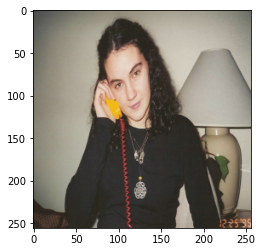

Label: 1


In [4]:
import matplotlib.pyplot as plt
data = next(iter(pascalDL))
print(f"ground truth image shape: {data['image'].size()}")
print(f"blurred image shape: {data['inputImg'].size()}")
print(f"class shape: {data['class'].size()}")
img = data['image'][4].squeeze()
label = data['class'][4]
plt.imshow(img.permute(1,2,0))
plt.show()
print(f"Label: {label}")

In [5]:
from torch.utils.data import DataLoader
cocoData = CocoDataset('train2014', 'annotations/instances_train2014.json', transform=transform)
cocoDL = DataLoader(cocoData, batch_size=16, shuffle=True)

loading annotations into memory...
Done (t=5.26s)
creating index...
index created!
67172


ground truth image shape: torch.Size([16, 3, 256, 256])
blurred image shape: torch.Size([16, 3, 256, 256])
class shape: torch.Size([16])


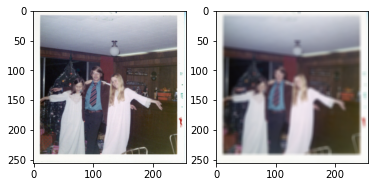

Label: 44


In [16]:
data = next(iter(cocoDL))
print(f"ground truth image shape: {data['image'].size()}")
print(f"blurred image shape: {data['inputImg'].size()}")
print(f"class shape: {data['class'].size()}")
img = data['image'][14].squeeze()
blurred_img = data['inputImg'][14].squeeze()
label = data['class'][14]
fig,axs = plt.subplots(1,2)
axs[0].imshow(img.permute(1,2,0))
axs[1].imshow(blurred_img.permute(1,2,0))
plt.show()
print(f"Label: {label}")